# 3D SARS-CoV-19 Protein Visualisation With Biopython

## Biopython

<div class="alert alert-block alert-info" style="Font-size:16px">
    
- Set of **tools** for **Biological computation**<br>
- Written in **Python**<br>
- Distributed **collaborative effort** to develop Python libraries and applications<br>
- Address the needs of current and future work in **Bioinformatics**<br>
    
</div>

### Applications

<div class="alert alert-block alert-success" style="Font-size:15px">
    
1. **Sequence Analysis** (DNA/RNA/Protein)<br>
2. **Transcription** & **Translation studies**<br>
3. Accessing **Bioinformatics Databases**<br>
a. NCBI<br>
b. PDB<br>

4. **3D Structure** Analysis
</div>

# Table of contents:<br>
1. [Attributes of Biopython](#1.-Attributes-of-Biopython)
2. [Understand FASTA file format](#2.-Understanding-FASTA-file-format)
3. [Sequence manipulation using Biopython](#3.-Sequence-manipulation-using-Biopython)
4. [Transcription & Translation studies](#4.-Transcription-&-Translation-Studies)
5. [Perform Basic Local Alignment using NCBI-BLAST](#5.-Basic-Local-Alignment-Using-NCBI-BLAST)
6. [Reading PDB file](#6.-Reading-PDB-file)
7. [Visualizing SARS-CoV-19 Protein structure](#7.-Visualizing-SARS-CoV-19-Protein-structure)

In [59]:
#%pip install pylab

## Modules

In [60]:
import Bio
import time
import pylab
import urllib
import pandas as pd
import nglview as nv
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
# from Bio.Alphabet import IUPAC
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser,MMCIFParser
from Bio.SeqUtils import gc_fraction,molecular_weight
# from Bio.Alphabet import generic_dna,generic_rna,generic_protein

## 1. Attributes of Biopython:

List of functions and attributes needed to complete the following tasks:

In [61]:
# Check Attributes of Biopython
dir(Bio)

['Align',
 'AlignIO',
 'BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'Blast',
 'Data',
 'File',
 'GenBank',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'Nexus',
 'PDB',
 'SVDSuperimposer',
 'SearchIO',
 'Seq',
 'SeqFeature',
 'SeqIO',
 'SeqRecord',
 'SeqUtils',
 'Sequencing',
 'StreamModeError',
 'SwissProt',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 '_utils',
 'os',
 'warnings']

## 2. Understanding FASTA file format

#### SEQUENCE SOURCE

<a href="https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3?report=fasta"> **SARS-CoV-19 SEQUENCE FROM NCBI**<a>

### GENETIC MATERIAL

<div class="alert alert-block alert-info" style="Font-size:16px">

**DNA** (Deoxy-Ribonucleic Acid) constitutes of 4 Bases **A T G C**<br>
**RNA** (Ribonucleic Acid) is composed of **U** instead of **T**<br>
    
</div>

### 2.1. FASTA Format

### FASTA File

    
**\> Description_of_DNA_sequence**
<br>
ATGCTGCGAGACAGACAGACATACTATCATCTCAGACGCAG<br>
ATGCTGCGAGACAGACAGACATACTATCATCTCAGACGCAG<br>


### 2.2. Reading from file

In [62]:
# Loading FASTA file
seq_file_read = SeqIO.read("/Users/montaha.chowdhury/Documents/Comp Bio Learning/3D SARS-Cov-2 Protein Visualization/3D-SARS-CoV-19-Protein-Visualization/Sequence_Data/sequence.fasta", "fasta")
seq_file_read

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [63]:
type(seq_file_read)

Bio.SeqRecord.SeqRecord

### 2.3 Sequence details

In [64]:
# list sequence details
seq_file_read.id

'MN908947.3'

In [65]:
#sequence returned
seqfromfile = seq_file_read.seq
seqfromfile

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [66]:
# list sequence details
for record in SeqIO.parse("/Users/montaha.chowdhury/Documents/Comp Bio Learning/3D SARS-Cov-2 Protein Visualization/3D-SARS-CoV-19-Protein-Visualization/Sequence_Data/sequence.fasta", "fasta"):
    print(record)

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [67]:
# store sequence for later analysis
seqfromfile = record.seq
seqfromfile

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [68]:
# length of sequence
len(seqfromfile)

29903

In [69]:
#molecular weight
molecular_weight(seqfromfile)

9241219.214400413

## 3. Sequence manipulation using Biopython

<div class="alert alert-block alert-warning" style="Font-size:16px">
- indexing/slicing<br>
- concatination<br>
- codon search<br>
- GC content<br>
- complement<br>

</div>

### 3.1. Indexing / Slicing

In [70]:
# CODON
seqfromfile[0:4]

Seq('ATTA')

### 3.2. Concatination

In [71]:
seqfromfile[0:3]+seqfromfile[-3:]

Seq('ATTAAA')

In [72]:
concat = seqfromfile[:6]+seqfromfile[-5:]
concat

Seq('ATTAAAAAAAA')

### 3.3. Codon Search

In [73]:
seqfromfile.find('AGA')

54

### 3.4. GC Content

In [74]:
# LOGIC
(seqfromfile.count('G')+seqfromfile.count('C'))/(len(seqfromfile))*100

37.97277865097147

In [75]:
#GC content using Biopython
gc_fraction(seqfromfile)

0.3797277865097147

### 3.5. Complement

<div class="alert alert-block alert-info" style="Font-size:16px">

In **DNA** <br>
    **A** Bonds with **T** (DOUBLE BOND)<br>
    **G** Bonds with **C** (TRIPLE BOND)<br>
    
</div>

In [76]:
seqfromfile[:11]

Seq('ATTAAAGGTTT')

In [77]:
#complement

seqfromfile[:11].complement()

Seq('TAATTTCCAAA')

In [78]:
#reverse complement

seqfromfile[:11].reverse_complement()

Seq('AAACCTTTAAT')

In [79]:
seqfromfile[-10:].reverse_complement()

Seq('TTTTTTTTTT')

## 4. Transcription & Translation Studies

<div class="alert alert-block alert-warning" style="font-size:16px">
DNA > RNA = Transcription
</div>
<div class="alert alert-block alert-warning" style="font-size:16px">
mRNA > amino acid (protein) = Translation
</div>

### 4.1. Transcription

In [80]:
#Transcribe
mRNA = seqfromfile.transcribe()
mRNA[:10]


Seq('AUUAAAGGUU')

In [81]:
#Back transcribe
mRNA.back_transcribe()


Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

### 4.2. Translation

In [82]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [83]:
protein_seq = seqfromfile.translate()
protein_seq[:10]

/Users/montaha.chowdhury/Library/Python/3.9/lib/python/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*Q')

In [84]:
len(protein_seq)

9967

In [85]:
len(seqfromfile)

29903

### Can protein sequences be reverse translated ?
<div class="alert alert-block alert-info">
<b>Note</b> : there is no function called `back_translate` so we'll make use of `back_transcribe`.
</div>

In [86]:
protein_seq.back_transcribe()

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

### This error is true for all the biological life too...
<div class="alert alert-block alert-warning">
- we can't perform an exact "reverse translation" of course, since several amino acids are produced by the same codon.
</div>

In [87]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [88]:
# Listing the most common amino acids
common_amino = Counter(protein_seq)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0, 0.5, 'frequency')

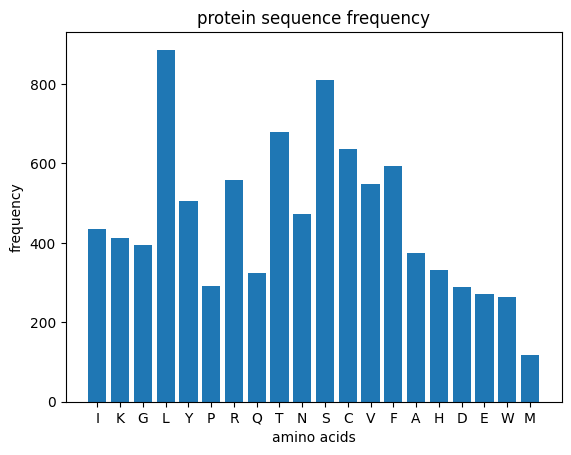

In [89]:
# visualize all 20 amino acid occurrences in the form of a histogram
del common_amino['*']

pylab.bar(common_amino.keys(),common_amino.values())
          
pylab.title("protein sequence frequency")
pylab.xlabel("amino acids")
pylab.ylabel("frequency")


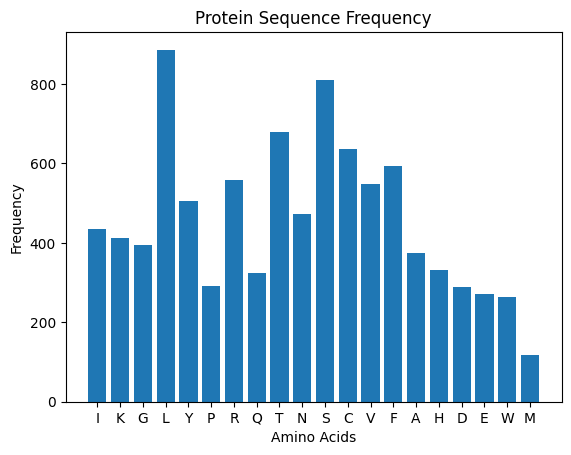

In [90]:
# Assuming `common_amino` is a dictionary with amino acids as keys and their occurrences as values
# Remove the stop codon if present
if '*' in common_amino:
    del common_amino['*']

# Plot the histogram
pylab.bar(common_amino.keys(), common_amino.values())

# Add title and labels
pylab.title("Protein Sequence Frequency")
pylab.xlabel("Amino Acids")
pylab.ylabel("Frequency")

# Show the plot
pylab.show()

### Since stop codon * signifies end of a protein we can split the sequence using ( * )

protein_seq.split('*'):

protein_seq: This is assumed to be a string containing a sequence of amino acids or nucleotides.
.split('*'): The split method is used to divide the string protein_seq into a list of substrings. The delimiter used for splitting is the asterisk ('*'). This means that wherever an asterisk appears in protein_seq, it will be used as a point to split the string.
Result: The result of this operation is a list of substrings, where each substring is a segment of the original protein_seq that was separated by an asterisk.
[str(i) for i in ...]:

This is a list comprehension, a concise way to create lists in Python.
for i in ...: This part iterates over each element i in the list generated by protein_seq.split('*').
str(i): Each element i is converted to a string (though it is likely already a string, this ensures that all elements are strings).
Result: The result of the list comprehension is a new list where each element is a string representation of the segments obtained from splitting protein_seq.
protein_list:

This variable now holds the list of string segments obtained from splitting protein_seq by the asterisk ('*').
protein_list[:10]:

This is a slicing operation.
[:10]: This slice notation means "take the first 10 elements of the list protein_list".
Result: The result is a new list containing the first 10 elements of protein_list.

In [91]:
# Step 1: Split the protein sequence into segments using the asterisk ('*') as the delimiter
# This will create a list of substrings
segments = protein_seq.split('*')

# Step 2: Convert each segment to a string (though they are likely already strings)
# This is done using a list comprehension
protein_list = [str(i) for i in segments]

# Step 3: Display the first 10 elements of the protein_list
# This is done using slicing notation [:10]
protein_list[:10]

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG']

In [92]:
# convert sequences to dataframe
large_proteins = [x for x in protein_list if len(x)>10]
df = pd.DataFrame({'protein_seq':large_proteins})

In [93]:
# Add a column with sequence lengths
# Import the pandas library
import pandas as pd

# Step 1: Filter the protein sequences to include only those with length greater than 10
# This is done using a list comprehension
# The condition len(x) > 10 ensures that only sequences longer than 10 characters are included
large_proteins = [x for x in protein_list if len(x) > 10]

# Step 2: Convert the filtered list of sequences into a pandas DataFrame
# The DataFrame will have one column named 'protein_seq'
# Each element in the 'large_proteins' list will be a row in this column
df = pd.DataFrame({'protein_seq': large_proteins})

# Display the first few rows of the DataFrame to verify the result
df['length'] = df['protein_seq'].apply(len)
df.head()


,protein_seq,length
0,QTNQLSISCRSVL,13
1,TNFKICVAVTRLHA,14
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER,35
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
4,TALCVHQTFGCSNCTSWSCYG,21


df['length'] = df['protein_seq'].apply(len):

df['length']: This creates a new column in the DataFrame df named 'length'.
df['protein_seq'].apply(len): The apply method is used to apply a function to each element in the 'protein_seq' column. In this case, the len function is applied to each sequence to calculate its length.
Result: The result is a new column 'length' in the DataFrame df that contains the length of each protein sequence.
df.head():

df.head(): This method displays the first five rows of the DataFrame df.
Result: This is used to verify that the new 'length' column has been added correctly and to inspect the first few rows of the DataFrame.
df.sort_values(by=['length'], ascending=False)[:10]:

df.sort_values(by=['length'], ascending=False): This method sorts the DataFrame df by the values in the 'length' column in descending order (because ascending=False).
[:10]: This slice notation means "take the first 10 rows of the sorted DataFrame".
Result: The result is a new DataFrame containing the top 10 longest protein sequences.

In [94]:
# Sort the DataFrame by the 'length' column in descending order
# This will arrange the sequences from longest to shortest
# The top 10 longest sequences are then selected using slicing notation [:10]
top_10_longest_sequences = df.sort_values(by=['length'], ascending=False)[:10]

# Display the top 10 longest sequences
top_10_longest_sequences

,protein_seq,length
118,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
157,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
168,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
158,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
167,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
93,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
188,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
116,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
182,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43


df.nlargest(1, 'length'):

df.nlargest(1, 'length'): This method returns the row(s) with the largest value(s) in the specified column. In this case, it returns the row with the largest value in the 'length' column.
1: This argument specifies that we want the single largest value.
'length': This is the column name by which the DataFrame is sorted to find the largest value.
Result: The result is a DataFrame one_large_protein containing the row with the longest protein sequence.
one_large_protein.iloc[0, 0]:

one_large_protein.iloc[0, 0]: The iloc method is used for integer-location based indexing to select specific cells in the DataFrame.
[0, 0]: This specifies the row and column indices. [0, 0] means the first row and the first column.
Result: The result is the value in the first row and first column of the one_large_protein DataFrame, which is the longest protein sequence.
single_prot:



In [95]:
# Extract the single longest protein sequence from the DataFrame
# The nlargest method is used to find the row with the largest value in the 'length' column
one_large_protein = df.nlargest(1, 'length')

# Step 7: Use iloc to select the first row and first column of the resulting DataFrame
# This extracts the longest protein sequence
single_prot = one_large_protein.iloc[0, 0]

# Display the longest protein sequence
single_prot

'CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSY

In [96]:
# write to a file
with open("/Users/montaha.chowdhury/Documents/Comp Bio Learning/3D SARS-Cov-2 Protein Visualization/3D-SARS-CoV-19-Protein-Visualization/Sequence_Data/single_prot.fasta","w") as file:
    file.write(">large protein\n"+single_prot)


## 5. Basic Local Alignment Using NCBI-BLAST

In [97]:
# Read single_seq.fasta
read = SeqIO.read("/Users/montaha.chowdhury/Documents/Comp Bio Learning/3D SARS-Cov-2 Protein Visualization/3D-SARS-CoV-19-Protein-Visualization/Sequence_Data/single_prot.fasta","fasta")
read.seq

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

%%time:

%%time: This is a Jupyter notebook cell magic command that measures the execution time of the entire cell. It will display the time taken to run the cell after execution.
Result: The result is a printed output showing the time taken to execute the cell.
NCBIWWW.qblast("blastp", "pdb", read.seq):

NCBIWWW.qblast: This function from the Bio.Blast module in Biopython is used to perform a BLAST (Basic Local Alignment Search Tool) search over the internet.
"blastp": This specifies the type of BLAST search to perform. "blastp" is used for protein-protein BLAST.
"pdb": This specifies the database to search against. "pdb" refers to the Protein Data Bank.
read.seq: This is the query sequence to be searched. It is assumed that read is an object containing a sequence attribute seq.
Result: The result is a handle (result_handle) to the BLAST search results.
SearchIO.read(result_handle, "blast-xml"):

SearchIO.read: This function from the Bio.SearchIO module in Biopython is used to parse BLAST results.
result_handle: This is the handle to the BLAST search results obtained from the qblast function.
"blast-xml": This specifies the format of the BLAST results. "blast-xml" indicates that the results are in XML format.
Result: The result is a blast_qresult object containing the parsed BLAST search results.

In [98]:
# Measure the execution time of the cell
start_time = time.time()

# Step 1: Perform a BLAST search using the qblast function
# The qblast function sends a request to the NCBI BLAST server
# "blastp" specifies a protein-protein BLAST search
# "pdb" specifies the Protein Data Bank as the database to search against
# read.seq is the query sequence to be searched
# Note: This query might take 2-3 minutes to run based on the server load
result_handle = NCBIWWW.qblast("blastp", "pdb", read.seq)

# Step 2: Parse the BLAST search results using the SearchIO.read function
# result_handle is the handle to the BLAST search results
# "blast-xml" specifies that the results are in XML format
blast_qresult = SearchIO.read(result_handle, "blast-xml")

# Measure the end time and calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Display the elapsed time
print(f"Elapsed time: {elapsed_time:.2f} seconds")


Elapsed time: 77.94 seconds


In [99]:
print(blast_qresult[0:5])

Program: blastp (2.16.0+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7D4F|A  Chain A, RNA-directed RNA polymerase [Sever...
            1      1  pdb|6YYT|A  Chain A, nsp12 [Severe acute respiratory sy...
            2      1  pdb|6XEZ|A  Chain A, RNA-directed RNA polymerase [Sever...
            3      1  pdb|7BW4|A  Chain A, RNA-directed RNA polymerase [Sever...
            4      1  pdb|6XQB|A  Chain A, RNA-directed RNA polymerase [Sever...


In [100]:
#fetch the id, description, evalue, bitscore & alignment of first hit

seqid = blast_qresult[0]

details = seqid[0]

print(f"\
Sequence ID:{seqid.id}\n\
description:{seqid.description}\n\
E value:    {details.evalue} \n\
Bit Score:  {details.bitscore}\n\
")

Sequence ID:pdb|7D4F|A
description:Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrome coronavirus 2]
E value:    0.0 
Bit Score:  1938.7



In [101]:
print(f"alignment:\n{details.aln}")

alignment:
Alignment with 2 rows and 926 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQA unnamed
LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQG pdb|7D4F|A


## 6. Reading PDB file

### Retreiving PDB Structure From RCSB PDB

In [102]:
seqid.id

'pdb|7D4F|A'

In [103]:
# split seqid
seqid.id.split('|')[1]


'7D4F'

In [104]:
import os
import urllib.request

# Define the directory and file path
directory = 'Sequence_data'
file_path = os.path.join(directory, '7D4F.pdb')

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Download the file
urllib.request.urlretrieve('https://files.rcsb.org/download/7D4F.pdb', file_path)

print(f"File downloaded and saved at {file_path}")


File downloaded and saved at Sequence_data/7D4F.pdb


Creating PDBParser Instance: Use the PDBParser class to create an instance for parsing PDB files.
Parsing PDB File: Use the get_structure method to read the PDB file and return a Structure object.
Displaying Structure Object: Display the Structure object containing the parsed data from the PDB file.

### 6.1 Reading PDB file

In [105]:
# Import necessary modules from Biopython
from Bio.PDB import PDBParser

# Step 1: Create an instance of the PDBParser class
# PDBParser is used to parse PDB files
parser = PDBParser()

# Step 2: Parse the PDB file and get the structure
# get_structure method reads the PDB file and returns a Structure object
# "7D4F" is the ID of the structure (can be any string)
# "Sequence_data/7D4F.pdb" is the path to the PDB file
structure = parser.get_structure("7D4F", "Sequence_data/7D4F.pdb")

# Display the Structure object
structure

# Example output (if the PDB file is valid and exists):
# <Structure id=7D4F>

<Structure id=7D4F>

### 6.2 Identifying the number of chains

#### Importing Modules:

from Bio.PDB import PDBParser: 
Import the PDBParser class from the Bio.PDB module in Biopython.
Creating PDBParser Instance:

 parser = PDBParser(): 
Create an instance of the PDBParser class. This instance will be used to parse PDB files.
Parsing PDB File:

structure = parser.get_structure("7D4F", "Sequence_data/7D4F.pdb"): 
Use the get_structure method to read the PDB file and return a Structure object. The first argument "7D4F" is the ID of the structure, and the second argument "Sequence_data/7D4F.pdb" is the path to the PDB file.

### Iterating Over Chains:

for chain in structure[0]:: Iterate over all chains in the first model of the structure. The structure[0] accesses the first model in the structure.
Printing Chain IDs:

print(f"chain ID: {chain.id}"): Print the ID of each chain. The chain.id attribute contains the ID of the chain.

In [106]:
# Import necessary modules from Biopython
from Bio.PDB import PDBParser

# Step 1: Create an instance of the PDBParser class
# PDBParser is used to parse PDB files
parser = PDBParser()

# Step 2: Parse the PDB file and get the structure
# get_structure method reads the PDB file and returns a Structure object
# "7D4F" is the ID of the structure (can be any string)
# "Sequence_data/7D4F.pdb" is the path to the PDB file
structure = parser.get_structure("7D4F", "Sequence_data/7D4F.pdb")

# Step 3: Iterate over all chains in the first model of the structure
# structure[0] accesses the first model in the structure
# The loop iterates over each chain in the first model
for chain in structure[0]:
    # Print the ID of each chain
    # chain.id contains the ID of the chain
    print(f"chain ID: {chain.id}")

# Example output (if the PDB file contains chains):
# chain ID: A
# chain ID: B
# ...

chain ID: B
chain ID: C
chain ID: G
chain ID: A


## 7. Visualizing SARS-CoV-19 Protein structure

### 7.1. nglview

In [110]:
import nglview as nv
from nglview import NGLWidget
nv.demo()

NGLWidget()

In [111]:
# Create an NGLWidget to visualize the structure
# nv.show_biopython creates an NGLWidget from a Biopython Structure object
view = nv.show_biopython(structure)

# Step 4: Display the NGLWidget
# The widget provides an interactive 3D visualization of the structure
view

NGLWidget()

### 7.2. nglview GUI

In [109]:
#GUI
nv.show_biopython(structure,gui=True)

NGLWidget()

## Observation:<br>
<div style="Font-size:16px">
A. Length 29903 base pairs<br>
B. GC content 37.97<br>
C. Protein content has high L & the largest protein is of length 2701 Amino acid<br>
D. Largest protein BLAST results corresponds to <b>SARS-CoV-19</b> 74DF <br>
E. Protein 6YYT has 8 chains & a DNA binding domain<br>
</div>

## Further Reading
1. [**Transcription & Translation**](https://www.nature.com/scitable/topicpage/translation-dna-to-mrna-to-protein-393/)
2. [**Biopython Tutorial and Cookbook**](http://biopython.org/DIST/docs/tutorial/Tutorial.html)